# Muons Extrapolated to the ECAL



In [1]:
import os
import sys
import psutil
import numpy as np
import pandas as pd

if "ROOTSYS" not in  os.environ:
    os.environ["ROOTSYS"]="/Users/maurik/root/master"

if '/Users/maurik/root/master/lib' not in sys.path:
    sys.path.append('/Users/maurik/root/master/lib')

def print_meminfo():
    process = psutil.Process(os.getpid())
    print(f"{process.name()} {process.pid}: res: {process.memory_info().rss/1e6:6.1f} MB  vm: {process.memory_info().vms/1e9:6.1f} GB")

sys.path.append("../Python")
import ROOT as R
%jsroot off
# R.EnableImplicitMT()
import os
recompile = True
try:
    if os.path.getmtime('../Python/Utility_Functions_C.so') - os.path.getmtime('../Python/Utility_Functions.C') > 0:
        recompile = False
        print("Recompile is not needed")
    else:
        print("Recompiling: ")
except:
    print("Recompile needed, file not found.")
if recompile:
    R.gROOT.LoadMacro("../Python/Utility_Functions.C++")
else:
    R.gSystem.Load("../Python/Utility_Functions_C.so")
R.Utility_Functions()
print_meminfo()

Recompile is not needed
python3.10 31714: res:  454.9 MB  vm:  420.7 GB


In [2]:
write_file = False
# These are the files with the normal fieldmap, with the extra information for the track state at last tracker plane information.
# data_files_pattern = "/data/HPS/data/MC/mum_2019/mum_90*_slic_recon.root"
#snapshot_file_name = "mum_2019_dfx_filtered.root"
#save_name_ext = ""
# 
#
# These are the no_fringe_zero fieldmap files. 
#data_files_pattern = "/data/HPS/data/MC/mum_2019_trunk_field/zero_field/mum_t0_80*_slic_recon.root"
#snapshot_file_name = "mum_2019_zero_fringe.root"
#save_name_ext = "_fringe_zero"
#
snapshot_file_name = "mum_2019_const_fringe.root"
save_name_ext = "_fringe_const"
data_files_pattern = "/data/HPS/data/MC/mum_2019_trunk_field/const_field/mum_t0_50*_slic_recon.root"


if write_file:
    
    ch_mum = R.TChain("MiniDST")
    nf = ch_mum.Add(data_files_pattern)
    print(f"N files added: {nf}")
    Num_Events = ch_mum.GetEntries()
    print(f"Loaded {Num_Events/1e6:6.3f}M events from {data_files_pattern}.")
    df = R.RDataFrame(ch_mum)
    # print(df.GetColumnNames())
    track_filter = "track_type[i]==1"
    
    
    loc_svt6_top = (891.5 + 899.)/2
    loc_svt6_width = (899. - 891.5)/2
    loc_svt6_bot = (907.5 + 915.)/2
    #loc_svt6_width = (915. - 907.5)/2
    #
    # Here we *REDEFINE* the track_xx quantities to be only KF tracks. 
    # This would not be needed of we only had KF tracks, but we might want to check with GBL as well.
    #
    dfx = df.Define("i_track","vector<int> out;for(int i=0;i<track_x_at_ecal.size();++i){if("f"{track_filter}"") out.push_back(i);}; return out;") \
        .Redefine("track_chi2","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_chi2[i_track[i]]);}; return out;") \
        .Redefine("track_x_at_ecal","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_x_at_ecal[i_track[i]]);}; return out;") \
        .Redefine("track_y_at_ecal","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_y_at_ecal[i_track[i]]);}; return out;") \
        .Redefine("track_z_at_ecal","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_z_at_ecal[i_track[i]]);}; return out;") \
        .Redefine("track_px","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_px[i_track[i]]);}; return out;") \
        .Redefine("track_py","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_py[i_track[i]]);}; return out;") \
        .Redefine("track_pz","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_pz[i_track[i]]);}; return out;") \
        .Redefine("track_omega","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_omega[i_track[i]]);}; return out;") \
        .Redefine("track_tan_lambda","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_tan_lambda[i_track[i]]);}; return out;") \
        .Redefine("track_phi0","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_phi0[i_track[i]]);}; return out;") \
        .Redefine("track_d0","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_d0[i_track[i]]);}; return out;") \
        .Define("track_p","vector<double> out;for(int i=0;i<i_track.size();++i){double p2=track_px[i_track[i]]*track_px[i_track[i]]+track_py[i_track[i]]*track_py[i_track[i]]+track_pz[i_track[i]]*track_pz[i_track[i]]; out.push_back(sqrt(p2));}; return out;") \
        .Redefine("track_omega_at_lasthit","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_omega_at_lasthit[i_track[i]]);}; return out;") \
        .Redefine("track_tan_lambda_at_lasthit","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_tan_lambda_at_lasthit[i_track[i]]);}; return out;") \
        .Redefine("track_phi0_at_lasthit","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_phi0_at_lasthit[i_track[i]]);}; return out;") \
        .Redefine("track_d0_at_lasthit","vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_d0_at_lasthit[i_track[i]]);}; return out;") \
        .Redefine("track_x_at_lasthit", "vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_x_at_lasthit[i_track[i]]);}; return out;") \
        .Redefine("track_y_at_lasthit", "vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_y_at_lasthit[i_track[i]]);}; return out;") \
        .Redefine("track_z_at_lasthit", "vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_z_at_lasthit[i_track[i]]);}; return out;") \
        .Redefine("track_px_at_lasthit", "vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_px_at_lasthit[i_track[i]]);}; return out;") \
        .Redefine("track_py_at_lasthit", "vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_py_at_lasthit[i_track[i]]);}; return out;") \
        .Redefine("track_pz_at_lasthit", "vector<double> out;for(int i=0;i<i_track.size();++i){out.push_back(track_pz_at_lasthit[i_track[i]]);}; return out;") \
        .Define("trackx_p_at_lasthit","vector<double> out; for(int i=0;i<track_omega_at_lasthit.size();++i){out.push_back(1.034*2.99792458e-4*abs(1./track_omega_at_lasthit[i]));};return out;")\
        .Define("trackx_px_at_lasthit","vector<double> out; for(int i=0;i<trackx_p_at_lasthit.size();++i){out.push_back(sin(track_phi0_at_lasthit[i])*trackx_p_at_lasthit[i]);};return out;")\
        .Define("trackx_py_at_lasthit","vector<double> out; for(int i=0;i<trackx_p_at_lasthit.size();++i){out.push_back(track_tan_lambda_at_lasthit[i]*trackx_p_at_lasthit[i]);};return out;")\
        .Define("trackx_pz_at_lasthit","vector<double> out; for(int i=0;i<trackx_p_at_lasthit.size();++i){out.push_back(cos(track_phi0_at_lasthit[i])*trackx_p_at_lasthit[i]);};return out;")\
        .Define("i_prim_mc_part","vector<int> out;for(int i=0;i<mc_part_sim_status.size();++i){if(mc_part_sim_status[i]&0x01) out.push_back(i);}; return out;") \
        .Define("i_prim_mc_ecal_score","vector<int> out;for(int i=0;i<mc_score_z.size();++i){if((mc_part_sim_status[mc_score_part_idx[i]]&0x01) && (abs(mc_score_z[i]-1443) < 1.) && mc_score_pz[i]> 0.01 )out.push_back(i);}; return out;") \
        .Define("i_prim_mc_svt6_score","vector<int> out;for(int i=0;i<mc_score_z.size();++i){if((mc_part_sim_status[mc_score_part_idx[i]]&0x01) &&"
                                       f"((abs(mc_score_z[i]-{loc_svt6_top})<{loc_svt6_width}) || (abs(mc_score_z[i]-{loc_svt6_bot})<{loc_svt6_width})) && mc_score_pz[i]> 0.01 )" "out.push_back(i);}; return out;") \
        .Define("mc_p_at_target","vector<double> out;for(auto i:i_prim_mc_part){double p2=mc_part_px[i]*mc_part_px[i]+mc_part_py[i]*mc_part_py[i]+mc_part_pz[i]*mc_part_pz[i]; out.push_back(sqrt(p2));}; return out;") \
        .Define("mc_p_at_ecal","vector<double> out;for(auto i:i_prim_mc_ecal_score){double p2=mc_score_px[i]*mc_score_px[i]+mc_score_py[i]*mc_score_py[i]+mc_score_pz[i]*mc_score_pz[i]; out.push_back(sqrt(p2));}; return out;") \
        .Define("mc_px_at_ecal","vector<double> out;for(auto i:i_prim_mc_ecal_score){out.push_back(mc_score_px[i]);}; return out;") \
        .Define("mc_py_at_ecal","vector<double> out;for(auto i:i_prim_mc_ecal_score){out.push_back(mc_score_py[i]);}; return out;") \
        .Define("mc_pz_at_ecal","vector<double> out;for(auto i:i_prim_mc_ecal_score){out.push_back(mc_score_pz[i]);}; return out;") \
        .Define("mc_x_at_ecal","vector<double> out;for(auto i:i_prim_mc_ecal_score){out.push_back(mc_score_x[i]);}; return out;") \
        .Define("mc_y_at_ecal","vector<double> out;for(auto i:i_prim_mc_ecal_score){out.push_back(mc_score_y[i]);}; return out;") \
        .Define("mc_z_at_ecal","vector<double> out;for(auto i:i_prim_mc_ecal_score){out.push_back(mc_score_z[i]);}; return out;") \
        .Define("mc_p_at_svt6","vector<double> out;for(auto i:i_prim_mc_svt6_score){double p2=mc_score_px[i]*mc_score_px[i]+mc_score_py[i]*mc_score_py[i]+mc_score_pz[i]*mc_score_pz[i]; out.push_back(sqrt(p2));}; return out;") \
        .Define("mc_px_at_svt6","vector<double> out;for(auto i:i_prim_mc_svt6_score){out.push_back(mc_score_px[i]);}; return out;") \
        .Define("mc_py_at_svt6","vector<double> out;for(auto i:i_prim_mc_svt6_score){out.push_back(mc_score_py[i]);}; return out;") \
        .Define("mc_pz_at_svt6","vector<double> out;for(auto i:i_prim_mc_svt6_score){out.push_back(mc_score_pz[i]);}; return out;") \
        .Define("mc_x_at_svt6","vector<double> out;for(auto i:i_prim_mc_svt6_score){out.push_back(mc_score_x[i]);}; return out;") \
        .Define("mc_y_at_svt6","vector<double> out;for(auto i:i_prim_mc_svt6_score){out.push_back(mc_score_y[i]);}; return out;") \
        .Define("mc_z_at_svt6","vector<double> out;for(auto i:i_prim_mc_svt6_score){out.push_back(mc_score_z[i]);}; return out;")
    dfx_filtered = dfx \
        .Filter("i_prim_mc_part.size()==1","Select only 1 Primary MC particle") \
        .Filter("i_track.size()==1","Select only 1 KF or GBL track.") \
        .Filter("i_prim_mc_ecal_score.size()==1","Select only 1 Primary MC particle at ECal") \
        .Filter("ecal_cluster_energy.size()==1","Select only 1 ECal cluster")\
        .Filter("i_prim_mc_svt6_score.size()==1","Select only 1 Primary MC particle at SVT6") 
     
    All_Names = list(dfx_filtered.GetColumnNames())
    Store_Names = []
    ii=0
    remove_names = ["v0_","hodo_","ext_trigger","part_","rf_","svt"]
    for n in All_Names:
        s = str(n)
        if not any([s.lower().startswith(x) for x in remove_names]):
            Store_Names.append(s)
            dat_type = dfx_filtered.GetColumnType(s).replace("ROOT::VecOps::RVec<","RVec<")
            print(f"{s:<30s} [{dat_type:<20s}]", end = " ")
            ii += 1
            if ii%2==0:
                 print("");
    
    cut_flow_res_ptr = dfx_filtered.Report()
    cut_flow= cut_flow_res_ptr.GetValue()
    # print(f"Creating the Snapshot {snapshot_file_name}.")
    # dfx_filtered.Snapshot("MiniDST",snapshot_file_name,Store_Names)
    #        file = R.TFile(snapshot_file_name,"UPDATE")
    #        file.WriteObject(cut_flow,"cut_flow")
    #        file.Close()
    print(f"\nCut flow:")
    cut_flow.Print()
    print("\n")


In [3]:

print_meminfo()
if write_file:
    print(f"Creating the Snapshot {snapshot_file_name}.")
    dfx_filtered.Snapshot("MiniDST",snapshot_file_name,Store_Names)
    file = R.TFile(snapshot_file_name,"UPDATE")
    file.WriteObject(cut_flow,"cut_flow")
    file.Close()
else:
    dfx_filtered = R.RDataFrame("MiniDST",snapshot_file_name)
    file = R.TFile(snapshot_file_name,"READ")
    cut_flow = file.Get("cut_flow")
    cut_flow.Print()
    file.Close()
print_meminfo()

python3.10 31714: res:  504.7 MB  vm:  420.7 GB
python3.10 31714: res:  541.4 MB  vm:  420.7 GB
Select only 1 Primary MC particle: pass=2367936    all=4623145    -- eff=51.22 % cumulative eff=51.22 %
Select only 1 KF or GBL track.: pass=940032     all=2367936    -- eff=39.70 % cumulative eff=20.33 %
Select only 1 Primary MC particle at ECal: pass=785502     all=940032     -- eff=83.56 % cumulative eff=16.99 %
Select only 1 ECal cluster: pass=389634     all=785502     -- eff=49.60 % cumulative eff=8.43 %
Select only 1 Primary MC particle at SVT6: pass=241612     all=389634     -- eff=62.01 % cumulative eff=5.23 %


In [4]:
class histograms:
    def __init__(self, df, name):
        self.df = df
        self.name = name
        #tmp = self.df.Histo1D(("_mc_p_at_target","Primary MC particle momentum at target; p [GeV]",1000,0.,5.),"mc_p_at_target")
        self.define_histograms()
        
    def define_histograms(self):
        name = self.name
        self.mc_p_at_target = self.df.Histo1D((f"{name}_mc_p_at_target","Primary MC particle momentum at target; p [GeV]",1000,0.,5.),"mc_p_at_target")
        self.mc_p_at_ecal = self.df.Histo1D((f"{name}_mc_p_at_ecal","Primary MC particle momentum at ECal; p [GeV]",1000,0.,5.),"mc_p_at_ecal")
        self.mc_p_at_svt6 = self.df.Histo1D((f"{name}_mc_p_at_svt6","Primary MC particle momentum at SVT6; p [GeV]",1000,0.,5.),"mc_p_at_svt6")
        self.eloss_to_ecal = self.df.Define("diff","return mc_p_at_target[0]-mc_p_at_ecal[0];").Histo1D((f"{name}_eloss_to_ecal","Momentum loss to ECal; p [GeV]",1000,0.,0.5),"diff")
        self.track_x_at_ecal = self.df.Histo1D((f"{name}_track_x_at_ecal","KF track x at ECal; x [mm]",1000,-400.,400.),"track_x_at_ecal")
        self.track_y_at_ecal = self.df.Histo1D((f"{name}_track_y_at_ecal","KF track y at ECal; y [mm]",1000,-100.,100.),"track_y_at_ecal")
        self.mc_x_at_ecal = self.df.Histo1D((f"{name}_mc_x_at_ecal","Primary MC particle x at ECal; x [mm]",1000,-400.,400.),"mc_x_at_ecal")
        self.mc_y_at_ecal = self.df.Histo1D((f"{name}_mc_y_at_ecal","Primary MC particle y at ECal; y [mm]",1000,-100.,100.),"mc_y_at_ecal")
        self.mc_x_at_svt6 = self.df.Histo1D((f"{name}_mc_x_at_svt6","Primary MC particle x at SVT6; x [mm]",1000,-400.,400.),"mc_x_at_svt6")
        self.mc_y_at_svt6 = self.df.Histo1D((f"{name}_mc_y_at_svt6","Primary MC particle y at SVT6; y [mm]",1000,-100.,100.),"mc_y_at_svt6")
        self.track_x_at_lasthit = self.df.Histo1D((f"{name}_track_x_at_lasthit","Track x at last hit;x [mm]",1000, -400,400.),"track_x_at_lasthit")
        self.track_y_at_lasthit = self.df.Histo1D((f"{name}_track_y_at_lasthit","Track y at last hit;y [mm]",1000,-100.,100.),"track_y_at_lasthit")
        self.track_z_at_lasthit = self.df.Histo1D((f"{name}_track_z_at_lasthit","Track z at last hit;z [mm]",1000,880.,920.),"track_z_at_lasthit")
        self.track_xy_at_lasthit = self.df.Histo2D((f"{name}_track_xy_at_lasthit","Track xy at last hit;x [mm];y [mm]",200,-250,250,200,-100,100),"track_x_at_lasthit","track_y_at_lasthit")
        self.mc_diff_x_at_ecal = self.df.Define("diff","return mc_x_at_ecal[0]-track_x_at_ecal[0];").Histo1D((f"{name}_mc_diff_x_at_ecal","KF Track #Delta x at ECal; #Delta x [mm]",1000,-100.,100.),"diff")
        self.mc_diff_y_at_ecal = self.df.Define("diff","return mc_y_at_ecal[0]-track_y_at_ecal[0];").Histo1D((f"{name}_mc_diff_y_at_ecal","KF Track #Delta y at ECal; #Delta y [mm]",1000,-5.,5.),"diff")
        self.diff_x_at_ecal_vs_p = self.df.Define("diff","return mc_x_at_ecal[0]-track_x_at_ecal[0];").Histo2D((f"{name}_diff_x_at_ecal_vs_p","KF Track #Delta x vs p; p [GeV]; #Delta x [mm]",300,0.,5.,300,-150.,10.),"mc_p_at_ecal", "diff")
        self.eloss_to_svt6 = self.df.Define("diff","vector<double> out; for(int i=0;i<mc_p_at_svt6.size();++i){out.push_back(mc_p_at_target[0]-mc_p_at_svt6[i]);};return out;").Histo1D((f"{name}_eloss_to_svt6","Momentum loss to SVT6; p [GeV]",1000,0.,0.5),"diff")
        df_plus = self.df.Filter("mc_x_at_svt6.size()==1").Define("mc_extrap_x","return mc_x_at_svt6[0]+(1443.-mc_z_at_svt6[0])*mc_px_at_svt6[0]/mc_pz_at_svt6[0];")\
             .Define("mc_extrap_y","return mc_y_at_svt6[0]+(1443.-mc_z_at_svt6[0])*mc_py_at_svt6[0]/mc_pz_at_svt6[0];") \
             .Define("mc_extrap_x_diff","return mc_extrap_x-mc_x_at_ecal[0];")\
             .Define("mc_extrap_y_diff","return mc_extrap_y-mc_y_at_ecal[0];")
        self.mc_extrap_x_to_ecal = df_plus.Histo1D((f"{name}_mc_extrap_x_to_ecal","Extrapolated x to ECal; x [mm]",1000,-400.,400.),"mc_extrap_x")
        self.mc_extrap_y_to_ecal = df_plus.Histo1D((f"{name}_mc_extrap_y_to_ecal","Extrapolated y to ECal; y [mm]",1000,-100.,100.),"mc_extrap_y")
        self.mc_extrap_x_diff = df_plus.Histo1D((f"{name}_mc_extrap_x_diff","Extrapolated x difference; x [mm]",1000,-100.,100.),"mc_extrap_x_diff")
        self.mc_extrap_y_diff = df_plus.Histo1D((f"{name}_mc_extrap_y_diff","Extrapolated y difference; y [mm]",1000,-5.,5.),"mc_extrap_y_diff")
        

In [5]:
h_mum = histograms(dfx_filtered,"h")

Info in <TCanvas::Print>: pdf file momenta_and_momentum_loss_fringe_const.pdf has been created


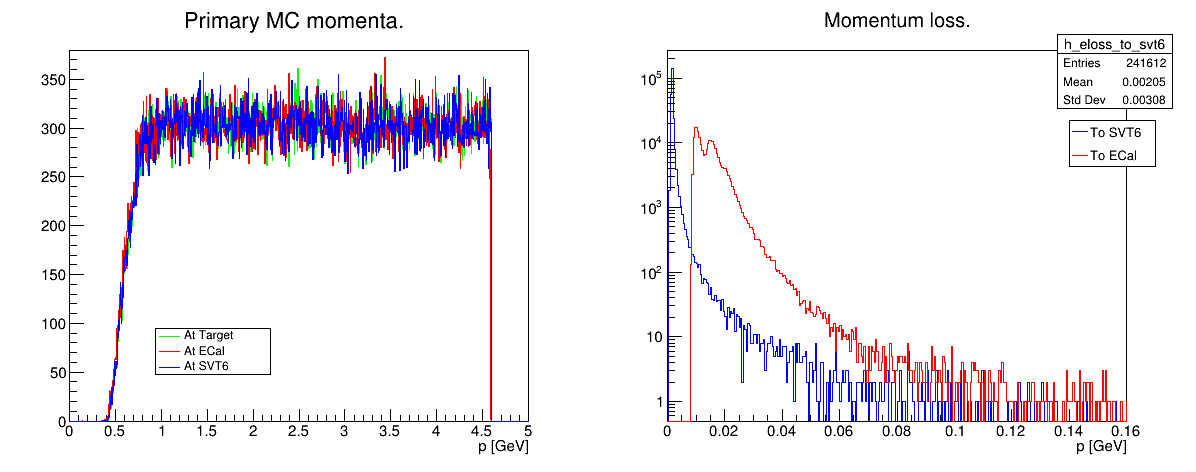

In [6]:
cc0 = R.TCanvas("cc0","cc0",1200,500)
cc0.Divide(2,1)
pad1 = cc0.cd(1)
h_mum.mc_p_at_target.SetStats(0)
h_mum.mc_p_at_target.SetTitle("Primary MC momenta.")
h_mum.mc_p_at_target.SetLineColor(R.kGreen)
h_mum.mc_p_at_target.Draw()
h_mum.mc_p_at_ecal.SetLineColor(R.kRed)
h_mum.mc_p_at_ecal.Draw("same")
h_mum.mc_p_at_svt6.SetLineColor(R.kBlue)
h_mum.mc_p_at_svt6.Draw("same")
legend = R.TLegend(0.25,0.2,0.45,0.3)
legend.AddEntry(h_mum.mc_p_at_target.GetPtr(),"At Target","l")
legend.AddEntry(h_mum.mc_p_at_ecal.GetPtr(),"At ECal","l")
legend.AddEntry(h_mum.mc_p_at_svt6.GetPtr(),"At SVT6","l")
legend.Draw()
pad2 = cc0.cd(2)
pad2.SetLogy()
h_mum.eloss_to_svt6.SetTitle("Momentum loss.")
h_mum.eloss_to_svt6.SetLineColor(R.kBlue)
h_mum.eloss_to_svt6.GetXaxis().SetRangeUser(0.,0.16)
h_mum.eloss_to_svt6.Draw()
h_mum.eloss_to_ecal.SetLineColor(R.kRed)
h_mum.eloss_to_ecal.Draw("same")
legend2 = R.TLegend(0.8,0.65,0.95,0.75)
legend2.AddEntry(h_mum.eloss_to_svt6.GetPtr(),"To SVT6","l")
legend2.AddEntry(h_mum.eloss_to_ecal.GetPtr(),"To ECal","l")
legend2.Draw()
cc0.Draw()
cc0.SaveAs("momenta_and_momentum_loss"+save_name_ext+".pdf")


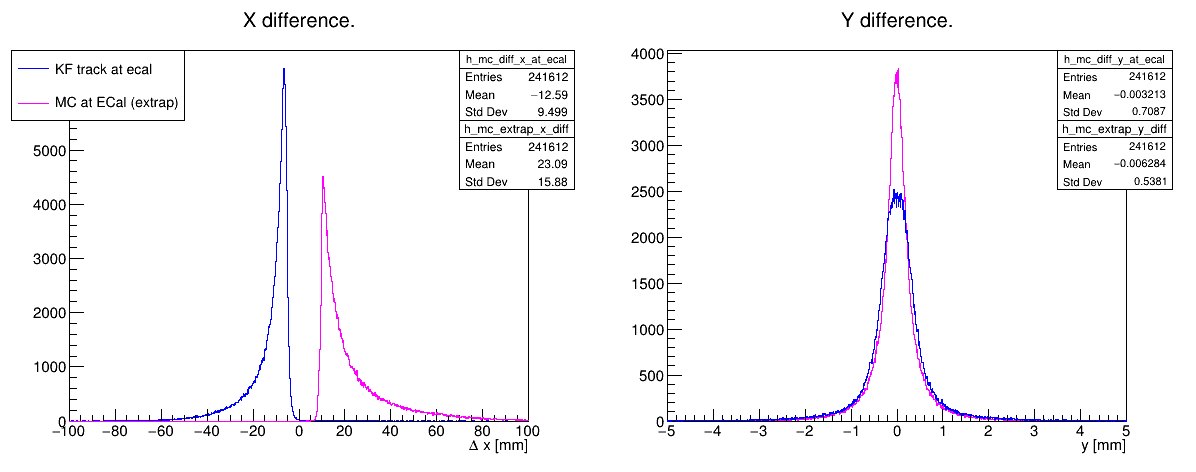

In [11]:
cc1 = R.TCanvas("cc1","cc1",1200,500)
cc1.Divide(2,1)
pad1 = cc1.cd(1)
h_mum.mc_x_at_svt6.SetTitle("X Position.")
h_mum.mc_x_at_svt6.SetLineColor(R.kGreen)
h_mum.mc_x_at_svt6.Draw()
h_mum.track_x_at_lasthit.SetLineColor(R.kGreen+2)
h_mum.track_x_at_lasthit.Draw("same")

h_mum.track_x_at_ecal.SetLineColor(R.kBlue)
h_mum.track_x_at_ecal.Draw("same")
h_mum.mc_x_at_ecal.SetLineColor(R.kRed)
h_mum.mc_x_at_ecal.Draw("same")
h_mum.mc_extrap_x_to_ecal.SetLineColor(R.kMagenta)
h_mum.mc_extrap_x_to_ecal.Draw("same")
legend = R.TLegend(0.,0.7,0.35,0.9)
legend.AddEntry(h_mum.track_x_at_lasthit.GetPtr(),"KF track at last hit","l")
legend.AddEntry(h_mum.track_x_at_ecal.GetPtr(),"KF track at ecal","l")
legend.AddEntry(h_mum.mc_x_at_ecal.GetPtr(),"MC at ECal","l")
legend.AddEntry(h_mum.mc_x_at_svt6.GetPtr(),"MC at SVT6","l")
legend.AddEntry(h_mum.mc_extrap_x_to_ecal.GetPtr(),"MC at ECal (extrap)","l")
legend.Draw()

pad2 = cc1.cd(2)
h_mum.mc_y_at_svt6.SetTitle("Y Position.")
h_mum.mc_y_at_svt6.SetLineColor(R.kGreen)
h_mum.mc_y_at_svt6.Draw("same")

h_mum.track_y_at_lasthit.SetLineColor(R.kGreen+2)
h_mum.track_y_at_lasthit.Draw("same")

h_mum.track_y_at_ecal.SetLineColor(R.kBlue)
h_mum.track_y_at_ecal.Draw("same")
h_mum.mc_y_at_ecal.SetLineColor(R.kRed)
h_mum.mc_y_at_ecal.Draw("same")
h_mum.mc_extrap_y_to_ecal.SetLineColor(R.kMagenta)
h_mum.mc_extrap_y_to_ecal.Draw("same")


cc1.Draw()
cc1.SaveAs("muon_x_and_y_distribution"+save_name_ext+".pdf")


cc1b = R.TCanvas("cc1b","cc1b",1200,500)
cc1b.Divide(2,1)
pad3 = cc1b.cd(1)
#pad3.SetLogy()
h_mum.mc_diff_x_at_ecal.SetTitle("X difference.")
h_mum.mc_diff_x_at_ecal.SetLineColor(R.kBlue)
h_mum.mc_extrap_x_diff.SetLineColor(R.kMagenta)
h_mum.mc_diff_x_at_ecal.Draw()
h_mum.mc_extrap_x_diff.Draw("sames")


legend = R.TLegend(0.,0.75,0.3,0.9)
legend.AddEntry(h_mum.mc_diff_x_at_ecal.GetPtr(),"KF track at ecal","l")
legend.AddEntry(h_mum.mc_extrap_x_diff.GetPtr(),"MC at ECal (extrap)","l")
legend.Draw()

pad4 = cc1b.cd(2)
#pad4.SetLogy()
h_mum.mc_extrap_y_diff.SetTitle("Y difference.")
h_mum.mc_extrap_y_diff.SetLineColor(R.kMagenta)
h_mum.mc_extrap_y_diff.Draw()
h_mum.mc_diff_y_at_ecal.SetLineColor(R.kBlue)
h_mum.mc_diff_y_at_ecal.Draw("sames")
 
cc1b.Draw()

st_top = h_mum.mc_diff_x_at_ecal.GetListOfFunctions().FindObject("stats")
st_top.SetY1NDC(0.9)
st_top.SetY2NDC(0.75)
st_bot = h_mum.mc_extrap_x_diff.GetListOfFunctions().FindObject("stats")
st_bot.SetY1NDC(0.75)
st_bot.SetY2NDC(0.6)

st_top = h_mum.mc_diff_y_at_ecal.GetListOfFunctions().FindObject("stats")
st_top.SetY1NDC(0.9)
st_top.SetY2NDC(0.75)
st_bot = h_mum.mc_extrap_y_diff.GetListOfFunctions().FindObject("stats")
st_bot.SetY1NDC(0.75)
st_bot.SetY2NDC(0.6)

cc1b.SaveAs("muon_position_differences_ECAL"+save_name_ext+"lin.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cc1c


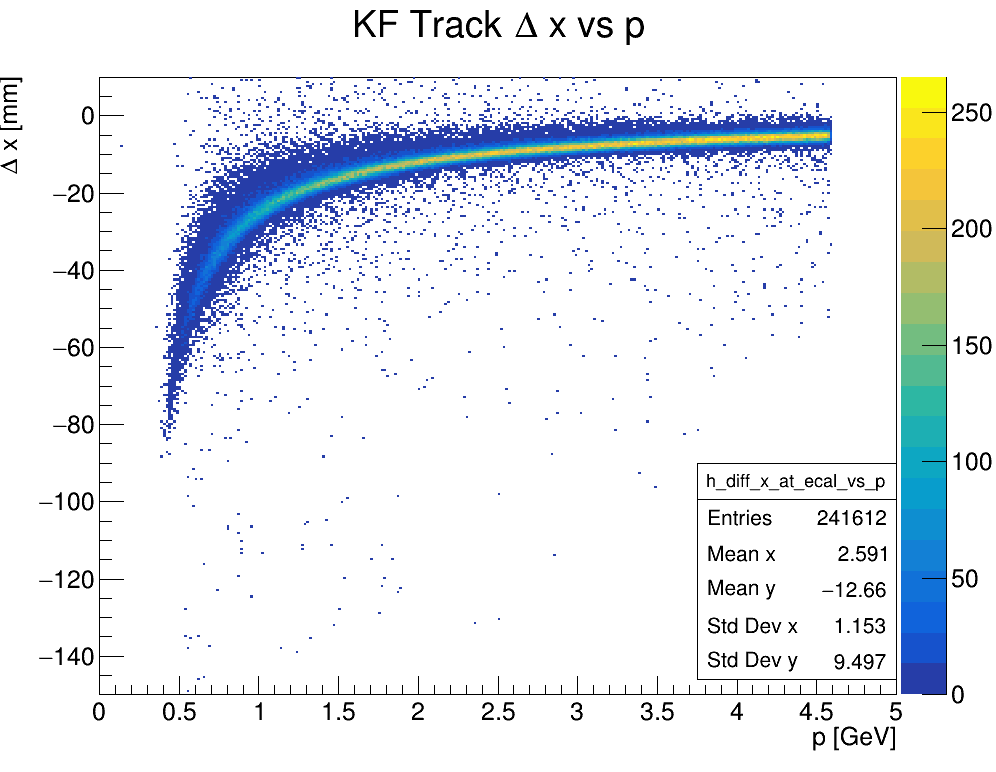

In [33]:
cc1c = R.TCanvas("cc1c","cc1c",1000,800)
h_mum.diff_x_at_ecal_vs_p.Draw("colz")
cc1c.Draw()
st_top = h_mum.diff_x_at_ecal_vs_p.GetListOfFunctions().FindObject("stats")
st_top.SetY1NDC(0.4)
st_top.SetY2NDC(0.12)
st_top.SetX1NDC(0.7)
st_top.SetX2NDC(0.9)

#cc1c.SaveAs("muon_position_differences_vs_momentum"+save_name_ext+".pdf")

# From hps_java Track - Cluster matching.
The hps_java code has a track - cluster matching class that can create histograms. For a very limited data sample, this was turned on in the steering file. The resulting plots are below.

In [9]:
f = R.TFile("KalmanFullTracks_TrackClusterMatching.root","READ")

In [10]:
h_track_cluster_dx = f.Get("KalmanFullTracks_ele_track_cluster_dx")
h_track_cluster_dy = f.Get("KalmanFullTracks_ele_track_cluster_dy")
h_track_cluster_matched_pair_dx = f.Get("KalmanFullTracks_ele_track_cluster_matched_pair_dx")
h_track_cluster_matched_pair_dy = f.Get("KalmanFullTracks_ele_track_cluster_matched_pair_dy")

Info in <TCanvas::Print>: pdf file hps_java_track_cluster_matching.pdf has been created


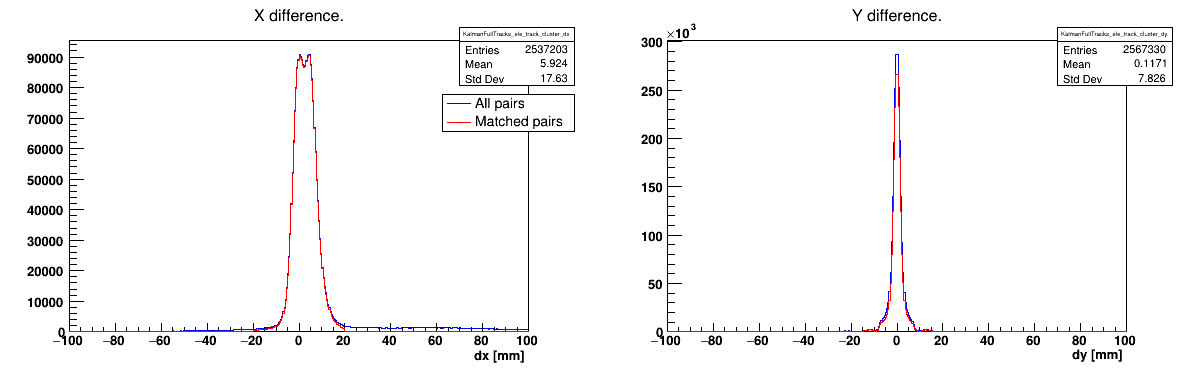

In [11]:
cc3 = R.TCanvas("cc3","cc3",1200,400)
cc3.Divide(2,1)
pad1 = cc3.cd(1)
h_track_cluster_dx.SetTitle("X difference.")
h_track_cluster_dx.GetXaxis().SetTitle("dx [mm]")
h_track_cluster_dx.GetXaxis().SetRangeUser(-100,100)
h_track_cluster_dx.SetLineColor(R.kBlue)
#h_track_cluster_dx.GetXaxis().SetRangeUser(-20,20)
h_track_cluster_dx.Draw()
h_track_cluster_matched_pair_dx.SetLineColor(R.kRed)
h_track_cluster_matched_pair_dx.Draw("same")
leg = R.TLegend(0.75,0.65,0.98,0.75)
leg.AddEntry(h_track_cluster_dx,"All pairs")
leg.AddEntry(h_track_cluster_matched_pair_dx,"Matched pairs")
leg.Draw()
pad2 = cc3.cd(2)
h_track_cluster_dy.SetTitle("Y difference.")
h_track_cluster_dy.GetXaxis().SetTitle("dy [mm]")
h_track_cluster_dy.GetXaxis().SetRangeUser(-100,100)
h_track_cluster_dy.SetLineColor(R.kBlue)
#h_track_cluster_dy.GetXaxis().SetRangeUser(-20,20)
h_track_cluster_dy.Draw()
h_track_cluster_matched_pair_dy.SetLineColor(R.kRed)
h_track_cluster_matched_pair_dy.Draw("same")
cc3.SaveAs("hps_java_track_cluster_matching.pdf")
cc3.Draw()



# Tracks at the last svt scoring plane

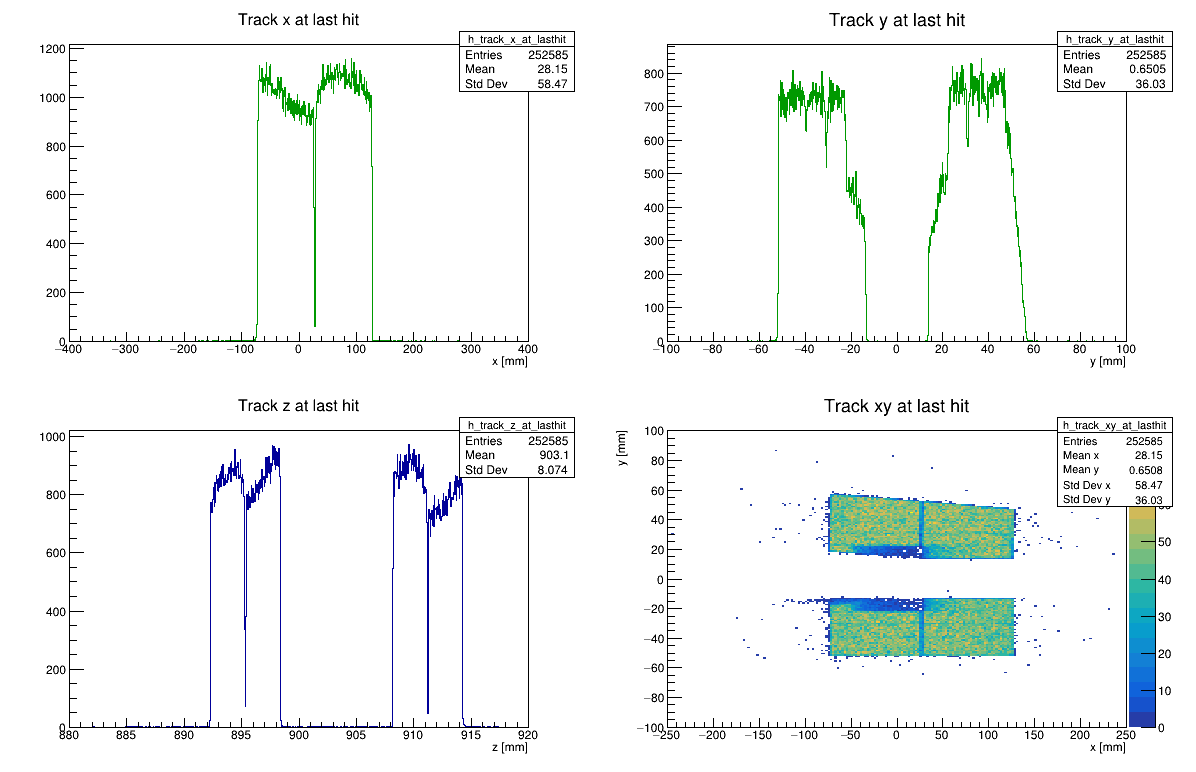

In [9]:
cc4 = R.TCanvas("cc4","cc4",1200,800)
cc4.Divide(2,2)
pad1 = cc4.cd(1)
h_mum.track_x_at_lasthit.Draw()
pad2 = cc4.cd(2)
h_mum.track_y_at_lasthit.Draw()
pad3 = cc4.cd(3)
h_mum.track_z_at_lasthit.Draw()
pad4 = cc4.cd(4)
h_mum.track_xy_at_lasthit.Draw("colz")
cc4.Draw()

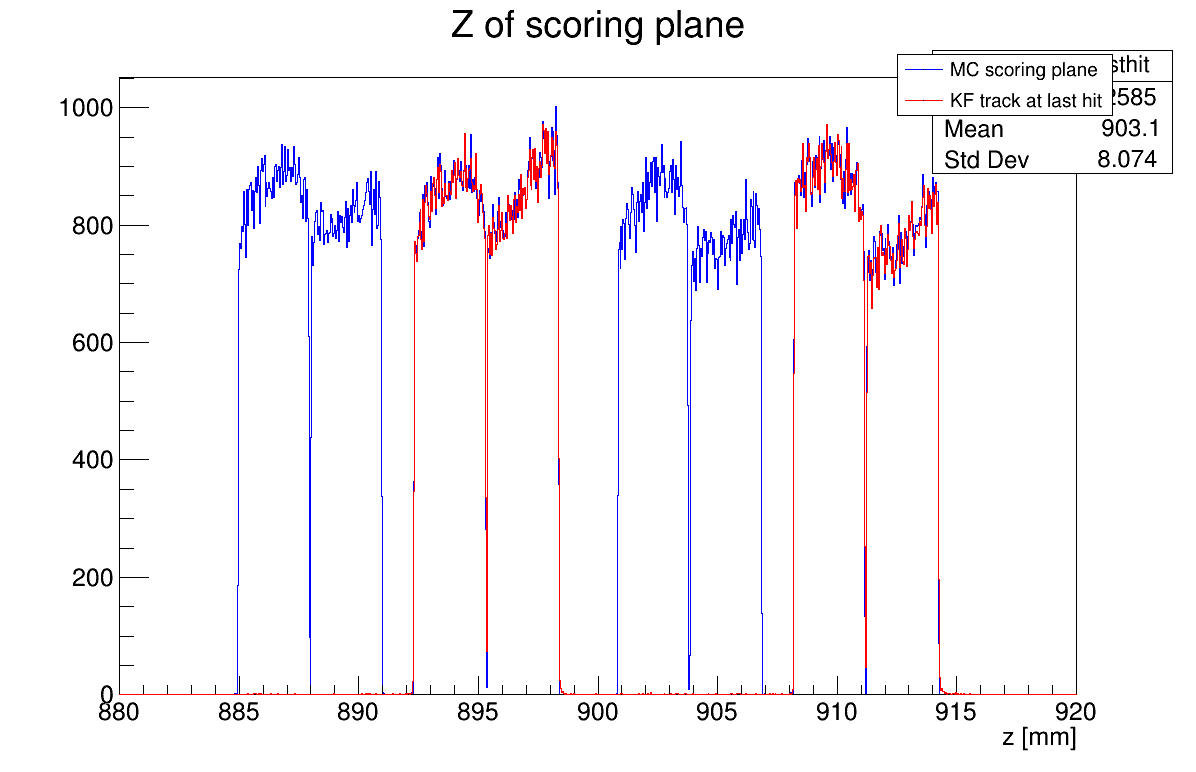

In [10]:
%jsroot off
h1_score_z = dfx_filtered.Define("mc_score_z_select","vector<double> out;for(int i=0;i<mc_score_z.size();++i){if(mc_score_z[i]>0. && mc_score_z[i]<1500.){out.push_back(mc_score_z[i]);}}; return out;").Histo1D(("h1_score_z","Z of scoring plane; z [mm]",1000,880.,920.),"mc_score_z_select")
cc5 = R.TCanvas("cc5","cc5",1200,800)
h1_score_z.SetStats(0)
h1_score_z.SetLineColor(R.kBlue)
h1_score_z.Draw()
h_mum.track_z_at_lasthit.SetLineColor(R.kRed)
h_mum.track_z_at_lasthit.Draw("same")
leg = R.TLegend(0.75,0.85,0.93,0.93)
leg.AddEntry(h1_score_z.GetPtr(),"MC scoring plane")
leg.AddEntry(h_mum.track_z_at_lasthit.GetPtr(),"KF track at last hit")
leg.Draw()
cc5.Draw()
#cc5.SaveAs("z_of_scoring_plane.pdf")

In [13]:
# h1_tmp = dfx_f2.Define("s","if(i_score_svt7t.size()==1){return mc_score_y[i_score_svt7t[0]];}; return -1.;").Histo1D("s")
# h1_tmp2 = dfx_f2.Define("s","if(i_score_svt7b.size()==1){return mc_score_y[i_score_svt7b[0]];}; return -1.;").Histo1D("s")
z_low = 880.
z_mid = 900.
z_hi =  920.

h1_score_z = dfx_filtered.Define("mc_score_z_select","vector<double> out;for(int i=0;i<mc_score_z.size();++i){if(mc_score_z[i]>"f"{z_low} && mc_score_z[i]<{z_mid}""){out.push_back(mc_score_z[i]);}}; return out;").Histo1D(("h1_score_z","Z of scoring plane; z[mm]",1000,z_low-10,z_hi+10),"mc_score_z_select")
h1_score_z2 = dfx_filtered.Define("mc_score_z_select","vector<double> out;for(int i=0;i<mc_score_z.size();++i){if(mc_score_z[i]>"f"{z_mid} && mc_score_z[i]<{z_hi}""){out.push_back(mc_score_z[i]);}}; return out;").Histo1D(("h1_score_z","Z of scoring plane; z[mm]",1000,z_low-10,z_hi+10),"mc_score_z_select")

h_track_z_at_lasthit = dfx_filtered.Histo1D(("h_track_z_at_lasthit","Track z at last hit;z [mm]",1000,z_low-10,z_hi+10),"track_z_at_lasthit")
h_track_x_at_lasthit = dfx_filtered.Histo1D(("h_track_x_at_lasthit","Track x at last hit;x [mm]",1000,-200.,200.),"track_x_at_lasthit")
h_track_y_at_lasthit = dfx_filtered.Histo1D(("h_track_y_at_lasthit","Track y at last hit;y [mm]",1000,-100.,100.),"track_y_at_lasthit")

h1_score_xz = dfx_filtered.Define("mc_score_z_i","vector<int> out;for(int i=0;i<mc_score_z.size();++i){if(mc_score_z[i]>"f"{z_low} && mc_score_z[i]<{z_mid}""){out.push_back(i);}}; return out;")\
             .Define("mc_score_x_select","vector<double> out; for(int i=0;i<mc_score_z_i.size();i++){out.push_back(mc_score_x[mc_score_z_i[i]]);};return out;")\
             .Define("mc_score_z_select","vector<double> out; for(int i=0;i<mc_score_z_i.size();i++){out.push_back(mc_score_z[mc_score_z_i[i]]);};return out;")\
             .Histo2D(("h1_score_xz","Z vs X of scoring plane; x [mm]; z[mm]",200, -100,150, 200,z_low-10,z_hi+10),"mc_score_x_select","mc_score_z_select")

h1_score_xz2 = dfx_filtered.Define("mc_score_z_i","vector<int> out;for(int i=0;i<mc_score_z.size();++i){if(mc_score_z[i]>"f"{z_mid} && mc_score_z[i]<{z_hi}""){out.push_back(i);}}; return out;")\
             .Define("mc_score_x_select","vector<double> out; for(int i=0;i<mc_score_z_i.size();i++){out.push_back(mc_score_x[mc_score_z_i[i]]);};return out;")\
             .Define("mc_score_z_select","vector<double> out; for(int i=0;i<mc_score_z_i.size();i++){out.push_back(mc_score_z[mc_score_z_i[i]]);};return out;")\
             .Histo2D(("h1_score_xz2","Z vs X of scoring plane; x[mm]; z[mm]",200, -100,150, 200,z_low-10,z_hi+10),"mc_score_x_select","mc_score_z_select")

h_track_xz_at_lasthit = dfx_filtered.Histo2D(("h_track_xz_at_lasthit","Track z vs x at last hit;x [mm]; z [mm]",100,-100.,150.,100,z_low-10,z_hi+10),"track_x_at_lasthit", "track_z_at_lasthit")

h1_tmp_x = dfx_filtered.Define("x","vector<double> out;for(int i=0; i<mc_score_z.size();++i){if(mc_score_z[i]>"f"{z_low}&&mc_score_z[i]<{z_mid}""){out.push_back(mc_score_x[i]);}}; return out;").Histo1D(("mscorey","MC Score x; x [mm]",1000,-200,200),"x")
h1_tmp_x2 = dfx_filtered.Define("x","vector<double> out;for(int i=0; i<mc_score_z.size();++i){if(mc_score_z[i]>"f"{z_mid}&&mc_score_z[i]<{z_hi}""){out.push_back(mc_score_x[i]);}}; return out;").Histo1D(("mscorey","MC Score x; x [mm]",1000,-200,200),"x")

h1_tmp_y = dfx_filtered.Define("y","vector<double> out;for(int i=0; i<mc_score_z.size();++i){if(mc_score_z[i]>"f"{z_low}&&mc_score_z[i]<{z_mid}""){out.push_back(mc_score_y[i]);}}; return out;").Histo1D(("mscorey","MC Score y; y [mm]",1000,-100,100),"y")
h1_tmp_y2 = dfx_filtered.Define("y","vector<double> out;for(int i=0; i<mc_score_z.size();++i){if(mc_score_z[i]>"f"{z_mid}&&mc_score_z[i]<{z_hi}""){out.push_back(mc_score_y[i]);}}; return out;").Histo1D(("mscorey","MC Score y; y[mm]",1000,-100,100),"y")

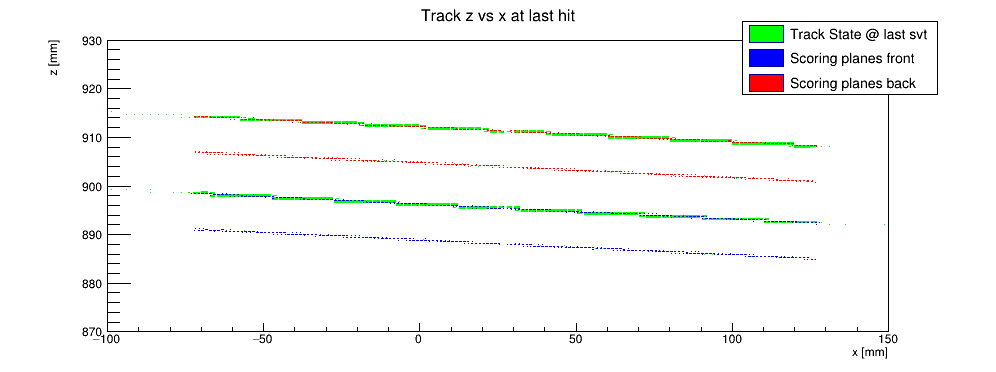

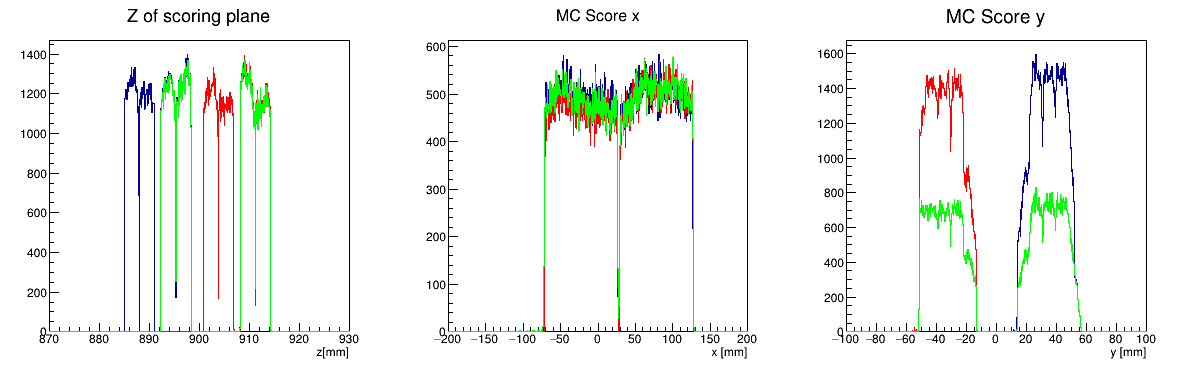

In [14]:
cc6 = R.TCanvas("cc6","cc6",1000,400)
cc6.Divide(1,1)
pad1 = cc6.cd(1)
h_track_xz_at_lasthit.SetStats(0)
h_track_xz_at_lasthit.SetFillColor(R.kGreen)
h_track_xz_at_lasthit.Draw("box same")

h1_score_xz.SetFillColor(R.kBlue)
h1_score_xz.Draw("box same")
h1_score_xz2.SetFillColor(R.kRed)
h1_score_xz2.Draw("box same")

leg1 = R.TLegend(0.75,0.75,0.95,0.95)
leg1.AddEntry(h_track_xz_at_lasthit.GetPtr(),"Track State @ last svt","f")
leg1.AddEntry(h1_score_xz.GetPtr(),"Scoring planes front","f")
leg1.AddEntry(h1_score_xz2.GetPtr(),"Scoring planes back","f")
leg1.Draw()
cc6.Draw()
#cc6.SaveAs("x_vs_z_of_scoring_plane.pdf")

cc6b = R.TCanvas("cc6b","cc6b",1200,400)
cc6b.Divide(3,1)
pad2 = cc6b.cd(1)
h1_score_z.SetStats(0)
h1_score_z.Draw()
h1_score_z2.SetLineColor(R.kRed)
h1_score_z2.Draw("same")
h_track_z_at_lasthit.SetLineColor(R.kGreen)
h_track_z_at_lasthit.Draw("same")

pad3 = cc6b.cd(2)
#pad1.SetLogy()
h1_tmp_x.SetStats(0)
h1_tmp_x.Draw("same")
h1_tmp_x2.SetLineColor(R.kRed)
h1_tmp_x2.Draw("same")
h_track_x_at_lasthit.SetLineColor(R.kGreen)
h_track_x_at_lasthit.Draw("same")

pad4 = cc6b.cd(3)
#pad2.SetLogy()
h1_tmp_y.SetStats(0)
h1_tmp_y.Draw("same")
h1_tmp_y2.SetLineColor(R.kRed)
h1_tmp_y2.Draw("same")
h_track_y_at_lasthit.SetLineColor(R.kGreen)
h_track_y_at_lasthit.Draw("same")

cc6b.Draw()
#cc6b.SaveAs("z_x_y_of_scoring_plane.pdf")

In [15]:
h_test_n_hits = dfx_filtered.Define("mc_score_z_i","vector<int> out;for(int i=0;i<mc_score_z.size();++i){if(mc_score_z[i]>"f"{z_low} && mc_score_z[i]<{z_mid}""){out.push_back(i);}}; return out;").Define("s","mc_score_z_i.size()").Histo1D(("h_test_n_hits","N hits in scoring plane(s)",21,-0.5,20.5),"s")
h_test_n_track = dfx_filtered.Define("s","track_tan_lambda.size()").Histo1D(("h_test_n_track","N track",21,-0.5,20.5),"s")

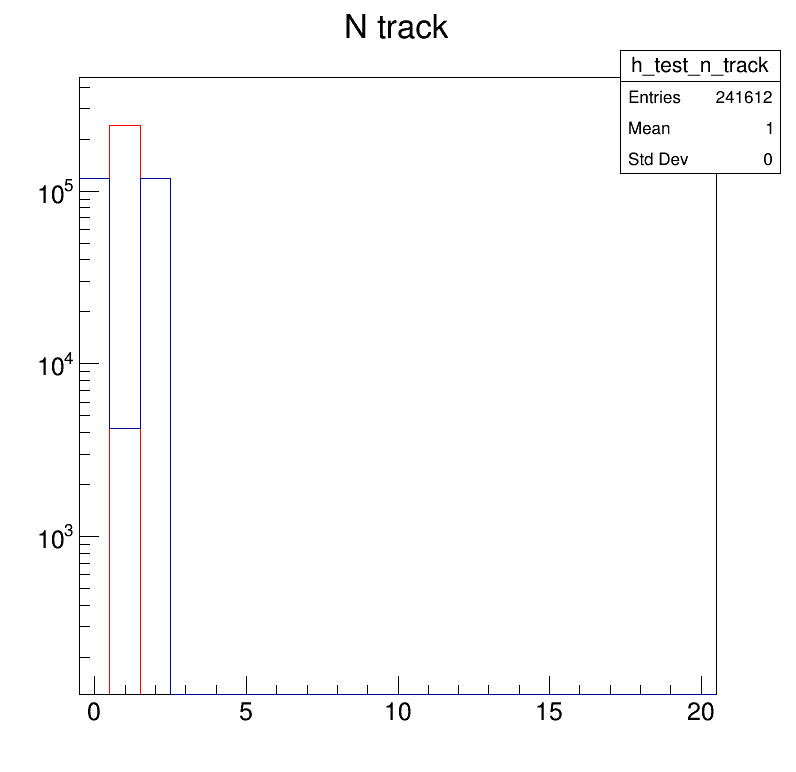

In [16]:
cc7 = R.TCanvas("cc7","cc7",800,800)
cc7.SetLogy()
h_test_n_track.SetLineColor(R.kRed)
h_test_n_track.Draw()
h_test_n_hits.Draw("same")
cc7.Draw()

In [17]:
h_tan_lambda = dfx_filtered.Histo1D(("h_tmp","Track tan lambda; tan(#lambda)",1000,-.1,.1),"track_tan_lambda")
h_tan_lambda_lasthit = dfx_filtered.Histo1D(("h_tmp2","Track tan lambda; tan(#lambda)",1000,-.1,.1),"track_tan_lambda_at_lasthit")
h_track_chi2_top = dfx_filtered.Filter("track_tan_lambda[0]>0.").Histo1D(("h_track_chi2_top","Track chi2 top; #chi^{2}",1000,0.,100.),"track_chi2")
h_track_chi2_bot = dfx_filtered.Filter("track_tan_lambda[0]<0.").Histo1D(("h_track_chi2_bot","Track chi2 bot; #chi^{2}",1000,0.,100.),"track_chi2")

Info in <TCanvas::Print>: pdf file track_tan_lambda_chi2_fringe_const.pdf has been created


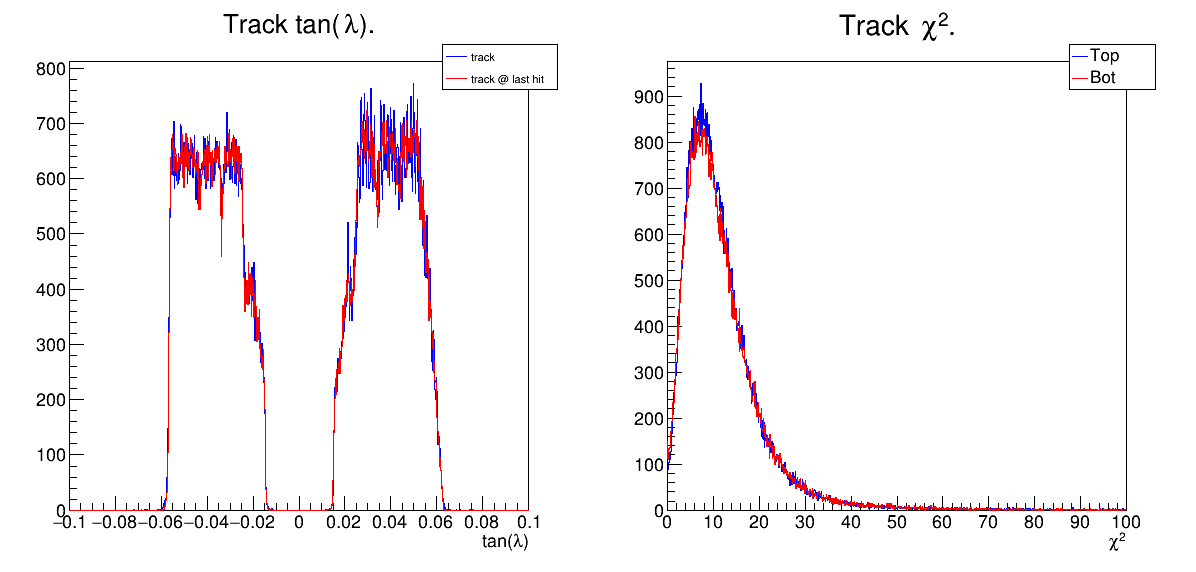

In [18]:
cc9 = R.TCanvas("cc9","cc9",1200,600)
cc9.Divide(2,1)
pad1 = cc9.cd(1)
h_tan_lambda.SetStats(0)
h_tan_lambda.SetTitle("Track tan(#lambda).")
h_tan_lambda.SetLineColor(R.kBlue)
h_tan_lambda.Draw()
h_tan_lambda_lasthit.SetLineColor(R.kRed)
h_tan_lambda_lasthit.Draw("same")
leg1 = R.TLegend(0.75,0.85,0.95,0.93)
leg1.AddEntry(h_tan_lambda.GetPtr(),"track","l")
leg1.AddEntry(h_tan_lambda_lasthit.GetPtr(),"track @ last hit","l")
leg1.Draw()
pad2 = cc9.cd(2)
h_track_chi2_top.SetStats(0)
h_track_chi2_top.SetTitle("Track #chi^{2}.")
h_track_chi2_top.SetLineColor(R.kBlue)
h_track_chi2_top.Draw()
h_track_chi2_bot.SetLineColor(R.kRed)
h_track_chi2_bot.Draw("same")
leg2 = R.TLegend(0.8,0.85,0.95,0.93)
leg2.AddEntry(h_track_chi2_top.GetPtr(),"Top","l")
leg2.AddEntry(h_track_chi2_bot.GetPtr(),"Bot","l")
leg2.Draw()
cc9.Draw()
cc9.SaveAs("track_tan_lambda_chi2"+save_name_ext+".pdf")

In [19]:
dfx_f2 = dfx_filtered \
.Define("mc_score_z_i_top","vector<int> out;for(int i=0;i<mc_score_z.size();++i){if(mc_score_z[i]>891.5 && mc_score_z[i]<900.){out.push_back(i);}}; return out;") \
.Define("mc_score_z_i_bot","vector<int> out;for(int i=0;i<mc_score_z.size();++i){if(mc_score_z[i]>907.5 && mc_score_z[i]<915.){out.push_back(i);}}; return out;") \
.Define("mc_score_x_select_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_x[mc_score_z_i_top[i]]);};return out;") \
.Define("mc_score_x_select_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_x[mc_score_z_i_bot[i]]);};return out;") \
.Define("mc_score_y_select_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_y[mc_score_z_i_top[i]]);};return out;") \
.Define("mc_score_y_select_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_y[mc_score_z_i_bot[i]]);};return out;") \
.Define("mc_score_z_select_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_z[mc_score_z_i_top[i]]);};return out;") \
.Define("mc_score_z_select_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_z[mc_score_z_i_bot[i]]);};return out;") \
.Define("mc_score_track_x_diff_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_x[mc_score_z_i_top[i]]-track_x_at_lasthit[0]);};return out;") \
.Define("mc_score_track_y_diff_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_y[mc_score_z_i_top[i]]-track_y_at_lasthit[0]);};return out;") \
.Define("mc_score_track_z_diff_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_z[mc_score_z_i_top[i]]-track_z_at_lasthit[0]);};return out;") \
.Define("mc_score_track_x_diff_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_x[mc_score_z_i_bot[i]]-track_x_at_lasthit[0]);};return out;") \
.Define("mc_score_track_y_diff_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_y[mc_score_z_i_bot[i]]-track_y_at_lasthit[0]);};return out;") \
.Define("mc_score_track_z_diff_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_z[mc_score_z_i_bot[i]]-track_z_at_lasthit[0]);};return out;") \
.Define("mc_score_px_select_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_px[mc_score_z_i_top[i]]);};return out;") \
.Define("mc_score_px_select_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_px[mc_score_z_i_bot[i]]);};return out;") \
.Define("mc_score_py_select_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_py[mc_score_z_i_top[i]]);};return out;") \
.Define("mc_score_py_select_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_py[mc_score_z_i_bot[i]]);};return out;") \
.Define("mc_score_pz_select_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_pz[mc_score_z_i_top[i]]);};return out;") \
.Define("mc_score_pz_select_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_pz[mc_score_z_i_bot[i]]);};return out;") \
.Define("track_p_at_lasthit","return sqrt(track_px_at_lasthit[0]*track_px_at_lasthit[0]+track_py_at_lasthit[0]*track_py_at_lasthit[0]+track_pz_at_lasthit[0]*track_pz_at_lasthit[0]);") \
.Define("mc_score_track_px_diff_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_px[mc_score_z_i_top[i]]-track_px_at_lasthit[0]);};return out;") \
.Define("mc_score_track_py_diff_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_py[mc_score_z_i_top[i]]-track_py_at_lasthit[0]);};return out;") \
.Define("mc_score_track_pz_diff_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(mc_score_pz[mc_score_z_i_top[i]]-track_pz_at_lasthit[0]);};return out;") \
.Define("mc_score_track_px_diff_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_px[mc_score_z_i_bot[i]]-track_px_at_lasthit[0]);};return out;") \
.Define("mc_score_track_py_diff_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_py[mc_score_z_i_bot[i]]-track_py_at_lasthit[0]);};return out;") \
.Define("mc_score_track_pz_diff_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(mc_score_pz[mc_score_z_i_bot[i]]-track_pz_at_lasthit[0]);};return out;") \
.Define("mc_score_ptht_select_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(atan2(mc_score_px[mc_score_z_i_top[i]],mc_score_pz[mc_score_z_i_top[i]]));};return out;") \
.Define("mc_score_ptht_select_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(atan2(mc_score_px[mc_score_z_i_bot[i]],mc_score_pz[mc_score_z_i_bot[i]]));};return out;") \
.Define("mc_score_pthty_select_top","vector<double> out; for(int i=0;i<mc_score_z_i_top.size();i++){out.push_back(atan2(mc_score_py[mc_score_z_i_top[i]],mc_score_pz[mc_score_z_i_top[i]]));};return out;") \
.Define("mc_score_pthty_select_bot","vector<double> out; for(int i=0;i<mc_score_z_i_bot.size();i++){out.push_back(atan2(mc_score_py[mc_score_z_i_bot[i]],mc_score_pz[mc_score_z_i_bot[i]]));};return out;") \
.Define("track_tht_at_lasthit","return atan2(track_px_at_lasthit[0],track_pz_at_lasthit[0])") \
.Define("track_thty_at_lasthit","return atan2(track_py_at_lasthit[0],track_pz_at_lasthit[0])") \
.Define("mc_score_track_tht_diff_top","vector<double> out; for(int i=0;i<mc_score_ptht_select_top.size();i++){out.push_back(mc_score_ptht_select_top[i]-track_tht_at_lasthit);};return out;")\
.Define("mc_score_track_tht_diff_bot","vector<double> out; for(int i=0;i<mc_score_ptht_select_bot.size();i++){out.push_back(mc_score_ptht_select_bot[i]-track_tht_at_lasthit);};return out;") \
.Define("mc_score_track_thty_diff_top","vector<double> out; for(int i=0;i<mc_score_ptht_select_top.size();i++){out.push_back(mc_score_pthty_select_top[i]-track_thty_at_lasthit);};return out;") \
.Define("mc_score_track_thty_diff_bot","vector<double> out; for(int i=0;i<mc_score_ptht_select_bot.size();i++){out.push_back(mc_score_pthty_select_bot[i]-track_thty_at_lasthit);};return out;")

dfx_f3 = dfx_f2.Filter("track_tan_lambda[0]>0")
dfx_f4 = dfx_f2.Filter("track_tan_lambda[0]<0")


In [20]:
h_score_track_x_diff_top = dfx_f3.Histo1D(("h_score_track_x_diff_top","MC Score - Track x difference, top; x [mm]",1000,-10.,10.),"mc_score_track_x_diff_top")
h_score_track_x_diff_bot = dfx_f4.Histo1D(("h_score_track_x_diff_bot","MC Score - Track x difference, bot; x [mm]",1000,-10.,10.),"mc_score_track_x_diff_bot")
h_score_track_y_diff_top = dfx_f3.Histo1D(("h_score_track_y_diff_top","MC Score - Track y difference, top; y [mm]",1000,-10.,10.),"mc_score_track_y_diff_top")
h_score_track_y_diff_bot = dfx_f4.Histo1D(("h_score_track_y_diff_bot","MC Score - Track y difference, bot; y [mm]",1000,-10.,10.),"mc_score_track_y_diff_bot")

momentum_plot_scale = 0.05
h_score_track_px_diff_top = dfx_f3.Histo1D(("h_score_track_px_diff_top","MC Score - Track px difference, top; p_{x} [GeV]",1000,-momentum_plot_scale,momentum_plot_scale),"mc_score_track_px_diff_top")
h_score_track_px_diff_bot = dfx_f4.Histo1D(("h_score_track_px_diff_bot","MC Score - Track px difference, bot; p_{x} [GeV]",1000,-momentum_plot_scale,momentum_plot_scale),"mc_score_track_px_diff_bot")
h_score_track_py_diff_top = dfx_f3.Histo1D(("h_score_track_py_diff_top","MC Score - Track py difference, top; p_{y} [GeV]",1000,-momentum_plot_scale,momentum_plot_scale),"mc_score_track_py_diff_top")
h_score_track_py_diff_bot = dfx_f4.Histo1D(("h_score_track_py_diff_bot","MC Score - Track py difference, bot; p_{y} [GeV]",1000,-momentum_plot_scale,momentum_plot_scale),"mc_score_track_py_diff_bot")

h_score_track_tht_diff_top = dfx_f3.Histo1D(("h_score_track_tht_diff_top","Tht diff score - track; #theta",400,-0.1,0.1),"mc_score_track_tht_diff_top")
h_score_track_tht_diff_bot = dfx_f4.Histo1D(("h_score_track_tht_diff_bot","Tht diff score - track; #theta",400,-0.1,0.1),"mc_score_track_tht_diff_bot")
h_score_track_thty_diff_top = dfx_f3.Histo1D(("h_score_track_thty_diff_top","Tht_y diff score - track; #theta_{y}",400,-0.1,0.1),"mc_score_track_thty_diff_top")
h_score_track_thty_diff_bot = dfx_f4.Histo1D(("h_score_track_thty_diff_bot","Tht_y diff score - track; #theta_{y}",400,-0.1,0.1),"mc_score_track_thty_diff_bot")
h_score_track_tht_diff_topz = dfx_f3.Histo1D(("h_score_track_tht_diff_top","Tht diff score - track; #theta",400,-0.01,0.05),"mc_score_track_tht_diff_top")
h_score_track_tht_diff_botz = dfx_f4.Histo1D(("h_score_track_tht_diff_bot","Tht diff score - track; #theta",400,-0.01,0.05),"mc_score_track_tht_diff_bot")
h_score_track_thty_diff_topz = dfx_f3.Histo1D(("h_score_track_thty_diff_top","Tht_y diff score - track; #theta_{y}",400,-0.01,0.01),"mc_score_track_thty_diff_top")
h_score_track_thty_diff_botz = dfx_f4.Histo1D(("h_score_track_thty_diff_bot","Tht_y diff score - track; #theta_{y}",400,-0.01,0.01),"mc_score_track_thty_diff_bot")

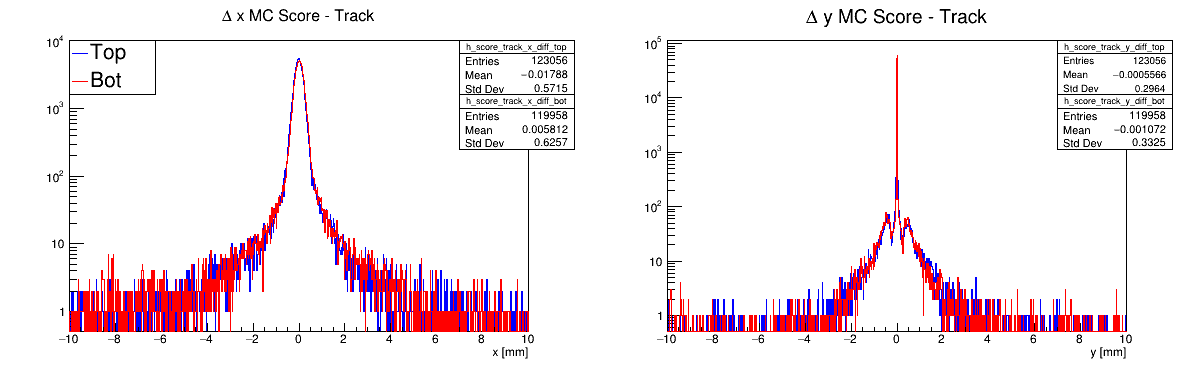

In [22]:
cc12 = R.TCanvas("cc12","cc12",1200,400)
cc12.Divide(2,1)
pad1 = cc12.cd(1)
pad1.SetLogy()
h_score_track_x_diff_top.SetTitle("#Delta x MC Score - Track")
h_score_track_x_diff_top.SetLineColor(R.kBlue)
h_score_track_x_diff_top.Draw()
h_score_track_x_diff_bot.SetLineColor(R.kRed)
h_score_track_x_diff_bot.Draw("sames")
leg = R.TLegend(0.1,0.75,0.25,0.9)
leg.AddEntry(h_score_track_x_diff_top.GetPtr(),"Top","l")
leg.AddEntry(h_score_track_x_diff_bot.GetPtr(),"Bot","l")
leg.Draw()
pad2 = cc12.cd(2)
pad2.SetLogy()
h_score_track_y_diff_top.SetTitle("#Delta y MC Score - Track")
h_score_track_y_diff_top.SetLineColor(R.kBlue)
h_score_track_y_diff_top.Draw()
h_score_track_y_diff_bot.SetLineColor(R.kRed)
h_score_track_y_diff_bot.Draw("sames")
cc12.Draw()

st_top = h_score_track_x_diff_top.GetListOfFunctions().FindObject("stats")
st_top.SetY1NDC(0.9)
st_top.SetY2NDC(0.75)
st_bot = h_score_track_x_diff_bot.GetListOfFunctions().FindObject("stats")
st_bot.SetY1NDC(0.75)
st_bot.SetY2NDC(0.6)

st_top = h_score_track_y_diff_top.GetListOfFunctions().FindObject("stats")
st_top.SetY1NDC(0.9)
st_top.SetY2NDC(0.75)
st_bot = h_score_track_y_diff_bot.GetListOfFunctions().FindObject("stats")
st_bot.SetY1NDC(0.75)
st_bot.SetY2NDC(0.6)

cc12.SaveAs("track_score_x_y_differences"+save_name_ext+".pdf")

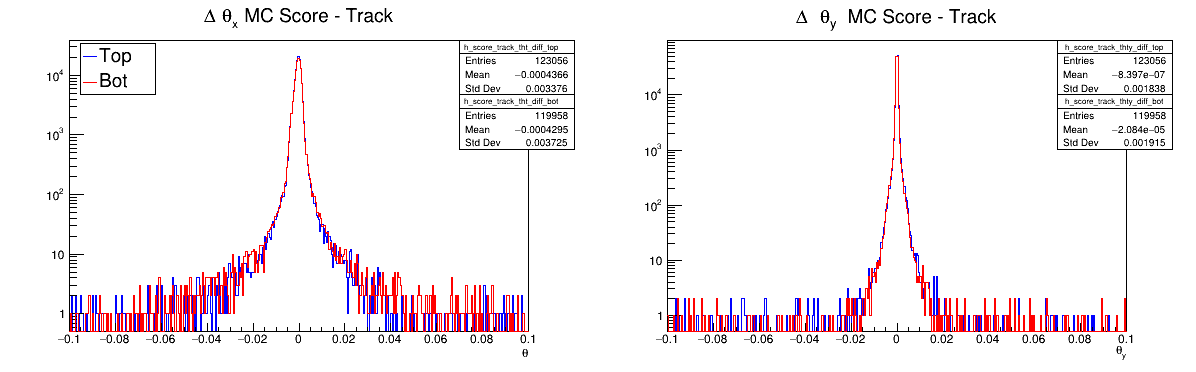

In [24]:
cc13 = R.TCanvas("cc12","cc12",1200,400)
cc13.Divide(2,1)
pad1 = cc13.cd(1)
pad1.SetLogy()
h_score_track_tht_diff_top.SetTitle("#Delta #theta_{x} MC Score - Track")
h_score_track_tht_diff_top.SetLineColor(R.kBlue)
h_score_track_tht_diff_top.Draw()
h_score_track_tht_diff_bot.SetLineColor(R.kRed)
h_score_track_tht_diff_bot.Draw("sames")
leg = R.TLegend(0.12,0.75,0.25,0.89)
leg.AddEntry(h_score_track_tht_diff_top.GetPtr(),"Top","l")
leg.AddEntry(h_score_track_tht_diff_bot.GetPtr(),"Bot","l")
leg.Draw()
pad2 = cc13.cd(2)
pad2.SetLogy()
h_score_track_thty_diff_top.SetTitle("#Delta  #theta_{y}  MC Score - Track")
h_score_track_thty_diff_top.SetLineColor(R.kBlue)
h_score_track_thty_diff_top.Draw()
h_score_track_thty_diff_bot.SetLineColor(R.kRed)
h_score_track_thty_diff_bot.Draw("sames")
cc13.Draw()

st_top = h_score_track_tht_diff_top.GetListOfFunctions().FindObject("stats")
st_top.SetY1NDC(0.9)
st_top.SetY2NDC(0.75)
st_bot = h_score_track_tht_diff_bot.GetListOfFunctions().FindObject("stats")
st_bot.SetY1NDC(0.75)
st_bot.SetY2NDC(0.6)

st_top = h_score_track_thty_diff_top.GetListOfFunctions().FindObject("stats")
st_top.SetY1NDC(0.9)
st_top.SetY2NDC(0.75)
st_bot = h_score_track_thty_diff_bot.GetListOfFunctions().FindObject("stats")
st_bot.SetY1NDC(0.75)
st_bot.SetY2NDC(0.6)

cc13.SaveAs("track_score_tht_thty_differences"+save_name_ext+".pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cc12


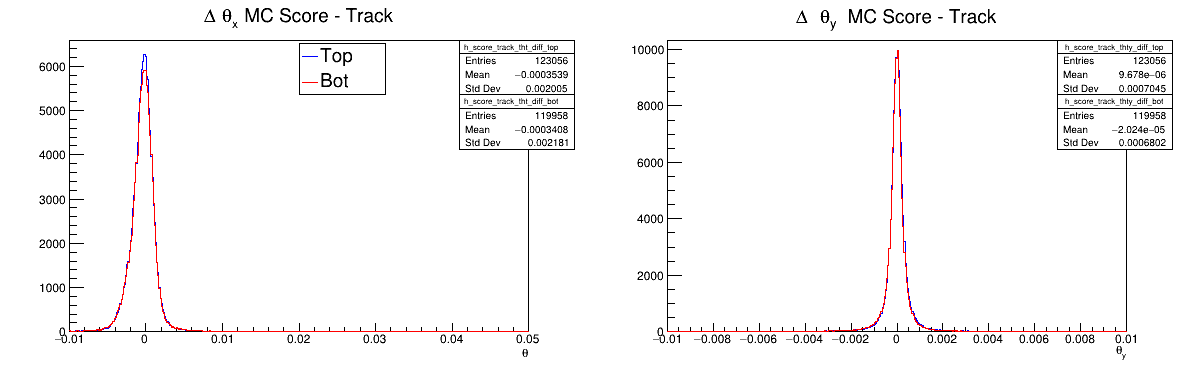

In [25]:
cc13 = R.TCanvas("cc12","cc12",1200,400)
cc13.Divide(2,1)
pad1 = cc13.cd(1)
#pad1.SetLogy()
h_score_track_tht_diff_topz.SetTitle("#Delta #theta_{x} MC Score - Track")
h_score_track_tht_diff_topz.SetLineColor(R.kBlue)
h_score_track_tht_diff_topz.Draw()
h_score_track_tht_diff_botz.SetLineColor(R.kRed)
h_score_track_tht_diff_botz.Draw("sames")
leg = R.TLegend(0.5,0.75,0.65,0.89)
leg.AddEntry(h_score_track_tht_diff_topz.GetPtr(),"Top","l")
leg.AddEntry(h_score_track_tht_diff_botz.GetPtr(),"Bot","l")
leg.Draw()
pad2 = cc13.cd(2)
#pad2.SetLogy()
h_score_track_thty_diff_topz.SetTitle("#Delta  #theta_{y}  MC Score - Track")
h_score_track_thty_diff_topz.SetLineColor(R.kBlue)
h_score_track_thty_diff_topz.Draw()
h_score_track_thty_diff_botz.SetLineColor(R.kRed)
h_score_track_thty_diff_botz.Draw("sames")
cc13.Draw()

st_top = h_score_track_tht_diff_topz.GetListOfFunctions().FindObject("stats")
st_top.SetY1NDC(0.9)
st_top.SetY2NDC(0.75)
st_bot = h_score_track_tht_diff_botz.GetListOfFunctions().FindObject("stats")
st_bot.SetY1NDC(0.75)
st_bot.SetY2NDC(0.6)

st_top = h_score_track_thty_diff_topz.GetListOfFunctions().FindObject("stats")
st_top.SetY1NDC(0.9)
st_top.SetY2NDC(0.75)
st_bot = h_score_track_thty_diff_botz.GetListOfFunctions().FindObject("stats")
st_bot.SetY1NDC(0.75)
st_bot.SetY2NDC(0.6)

#cc13.SaveAs("track_score_tht_thty_differences"+save_name_ext+"_lin.pdf")

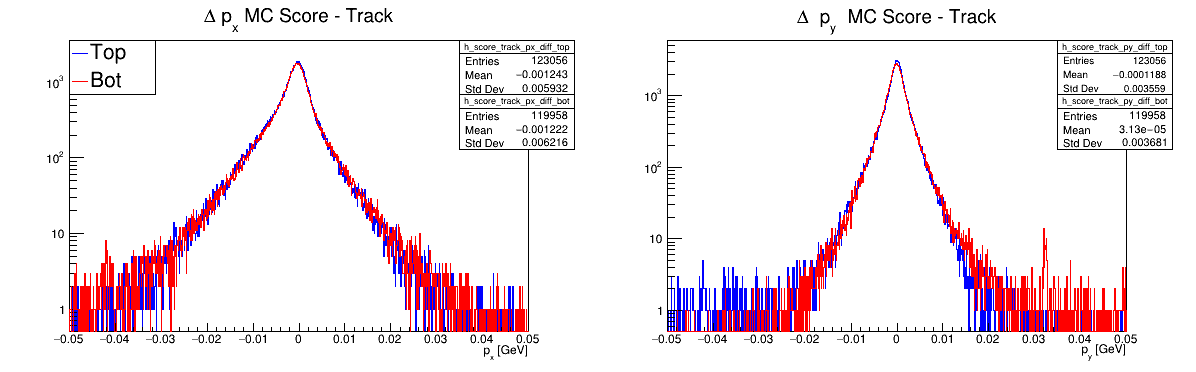

In [27]:
cc14 = R.TCanvas("cc12","cc12",1200,400)
cc14.Divide(2,1)
pad1 = cc14.cd(1)
pad1.SetLogy()
h_score_track_px_diff_top.SetTitle("#Delta p_{x} MC Score - Track")
h_score_track_px_diff_top.SetLineColor(R.kBlue)
h_score_track_px_diff_top.Draw()
h_score_track_px_diff_bot.SetLineColor(R.kRed)
h_score_track_px_diff_bot.Draw("sames")
leg = R.TLegend(0.1,0.75,0.25,0.9)
leg.AddEntry(h_score_track_px_diff_top.GetPtr(),"Top","l")
leg.AddEntry(h_score_track_px_diff_bot.GetPtr(),"Bot","l")
leg.Draw()
pad2 = cc14.cd(2)
pad2.SetLogy()
h_score_track_py_diff_top.SetTitle("#Delta  p_{y}  MC Score - Track")
h_score_track_py_diff_top.SetLineColor(R.kBlue)
h_score_track_py_diff_top.Draw()
h_score_track_py_diff_bot.SetLineColor(R.kRed)
h_score_track_py_diff_bot.Draw("sames")
cc14.Draw()

st_top = h_score_track_px_diff_top.GetListOfFunctions().FindObject("stats")
st_top.SetY1NDC(0.9)
st_top.SetY2NDC(0.75)
st_bot = h_score_track_px_diff_bot.GetListOfFunctions().FindObject("stats")
st_bot.SetY1NDC(0.75)
st_bot.SetY2NDC(0.6)

st_top = h_score_track_py_diff_top.GetListOfFunctions().FindObject("stats")
st_top.SetY1NDC(0.9)
st_top.SetY2NDC(0.75)
st_bot = h_score_track_py_diff_bot.GetListOfFunctions().FindObject("stats")
st_bot.SetY1NDC(0.75)
st_bot.SetY2NDC(0.6)

cc14.SaveAs("track_score_px_py_differences"+save_name_ext +".pdf")

In [28]:
dfx_f2.GetColumnNames()

vector<string>{ "ecal_cluster_energy", "ecal_cluster_hits", "ecal_cluster_mc_id", "ecal_cluster_mc_pdg", "ecal_cluster_mc_pdg_purity", "ecal_cluster_nhits", "ecal_cluster_seed_energy", "ecal_cluster_seed_index", "ecal_cluster_seed_ix", "ecal_cluster_seed_iy", "ecal_cluster_time", "ecal_cluster_uncor_energy", "ecal_cluster_uncor_hits", "ecal_cluster_uncor_nhits", "ecal_cluster_uncor_seed_energy", "ecal_cluster_uncor_seed_index", "ecal_cluster_uncor_seed_ix", "ecal_cluster_uncor_seed_iy", "ecal_cluster_uncor_time", "ecal_cluster_uncor_x", "ecal_cluster_uncor_y", "ecal_cluster_uncor_z", "ecal_cluster_x", "ecal_cluster_y", "ecal_cluster_z", "ecal_hit_energy", "ecal_hit_index_x", "ecal_hit_index_y", "ecal_hit_mc_contrib_ec", "ecal_hit_mc_contrib_id", "ecal_hit_mc_contrib_pdg", "ecal_hit_mc_parent_id", "ecal_hit_mc_parent_pdg", "ecal_hit_time", "ecal_hit_x", "ecal_hit_y", "ecal_hit_z", "event_number", "i_prim_mc_ecal_score", "i_prim_mc_part", "i_prim_mc_svt6_score", "i_track", "mc_p_at_ecal"

In [29]:
h_track_p_at_lasthit = dfx_f2.Histo1D(("h_track_p_at_lasthit","Track p at last hit; p [GeV]",1000,0.,5.),"track_p_at_lasthit")
h_track_diffx_vs_p_top = dfx_f3.Histo2D(("h_track_x_vs_p","Track #Delta x vs p top; p [GeV]; #Delta x [mm]",200,0.,5.,200,-10,10),"track_p_at_lasthit","mc_score_track_x_diff_top")
h_track_diffx_vs_p_bot = dfx_f4.Histo2D(("h_track_x_vs_p","Track #Delta x vs p bot; p [GeV]; #Delta x [mm]",200,0.,5.,200,-10,10),"track_p_at_lasthit","mc_score_track_x_diff_bot")
h_track_diffpx_vs_p_top = dfx_f3.Histo2D(("h_track_px_vs_p","Track #Delta px vs p top; p [GeV]; #Delta px [GeV]",200,0.,5.,200,-0.1,0.1),"track_p_at_lasthit","mc_score_track_px_diff_top")
h_track_diffpx_vs_p_bot = dfx_f4.Histo2D(("h_track_px_vs_p","Track #Delta px vs p bot; p [GeV]; #Delta px [GeV]",200,0.,5.,200,-0.1,0.1),"track_p_at_lasthit","mc_score_track_px_diff_bot")
h_track_difftht_vs_p_top = dfx_f3.Histo2D(("h_track_tht_vs_p","Track #Delta #theta vs p; p [GeV]; #Delta #theta [rad]",200,0.,5.,200,-0.05,0.1),"track_p_at_lasthit","mc_score_track_tht_diff_top")
h_track_difftht_vs_p_bot = dfx_f4.Histo2D(("h_track_tht_vs_p","Track #Delta #theta vs p; p [GeV]; #Delta #theta [rad]",200,0.,5.,200,-0.05,0.1),"track_p_at_lasthit","mc_score_track_tht_diff_bot")

Info in <TCanvas::Print>: pdf file track_score_x_diff_vs_p_fringe_const.pdf has been created


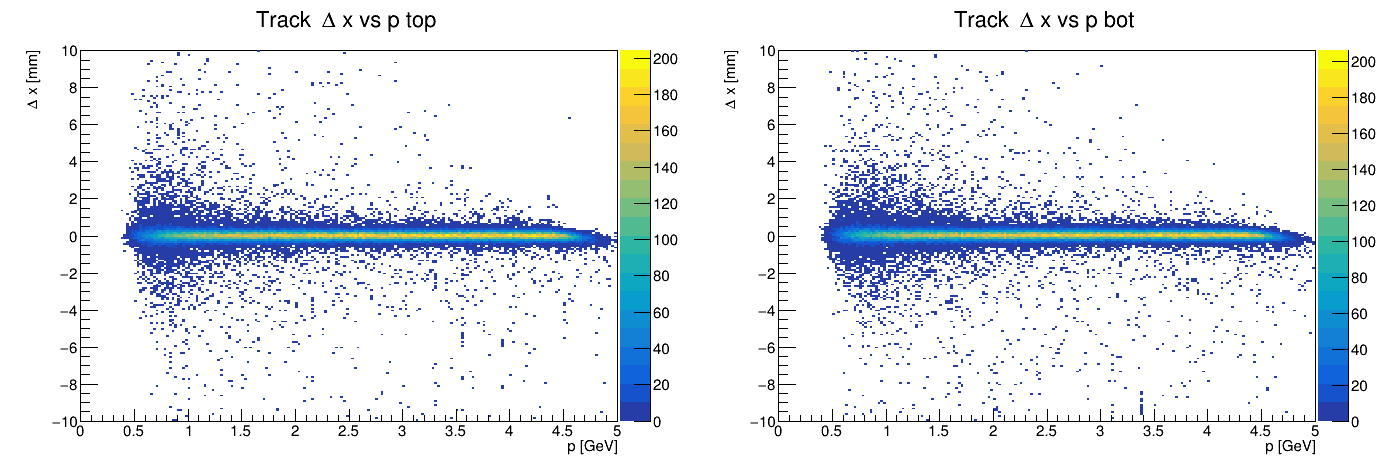

In [30]:
cc15 = R.TCanvas("cc15","cc15",1400,500)
cc15.Divide(2,1)
pad1 = cc15.cd(1)
h_track_diffx_vs_p_top.SetStats(0)
h_track_diffx_vs_p_top.Draw("colz")
pad2 = cc15.cd(2)
h_track_diffx_vs_p_bot.SetStats(0)
h_track_diffx_vs_p_bot.Draw("colz")
cc15.Draw()
cc15.SaveAs("track_score_x_diff_vs_p"+save_name_ext+".pdf")

Info in <TCanvas::Print>: pdf file track_score_px_diff_vs_p_fringe_const.pdf has been created


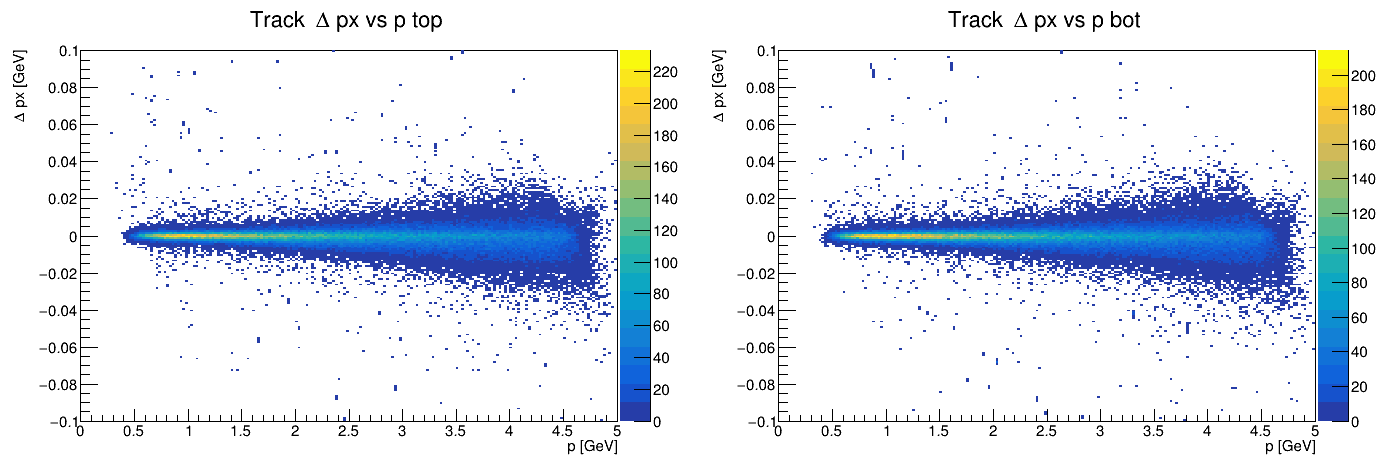

In [31]:
cc16 = R.TCanvas("cc16","cc15",1400,500)
cc16.Divide(2,1)
pad1 = cc16.cd(1)
h_track_diffpx_vs_p_top.SetStats(0)
h_track_diffpx_vs_p_top.Draw("colz")
pad2 = cc16.cd(2)
h_track_diffpx_vs_p_bot.SetStats(0)
h_track_diffpx_vs_p_bot.Draw("colz")
cc16.Draw()
cc16.SaveAs("track_score_px_diff_vs_p"+save_name_ext+".pdf")

Info in <TCanvas::Print>: pdf file track_score_tht_diff_vs_p_fringe_const.pdf has been created


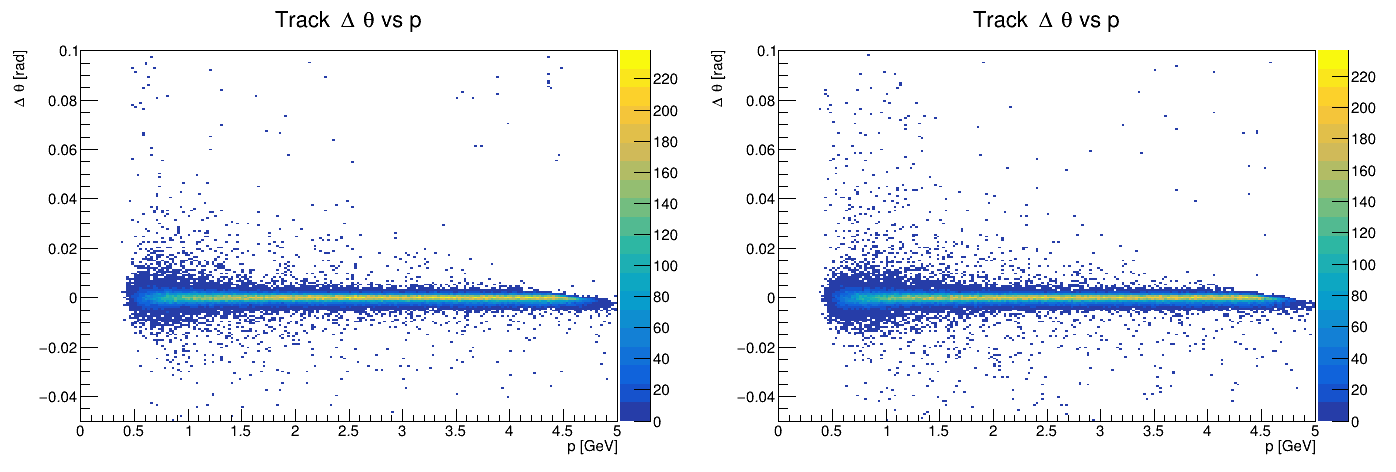

In [32]:
cc17 = R.TCanvas("cc17","cc17",1400,500)
cc17.Divide(2,1)
pad1 = cc17.cd(1)
h_track_difftht_vs_p_top.SetStats(0)
h_track_difftht_vs_p_top.Draw("colz")
pad2 = cc17.cd(2)
h_track_difftht_vs_p_bot.SetStats(0)
h_track_difftht_vs_p_bot.Draw("colz")
cc17.Draw()
cc17.SaveAs("track_score_tht_diff_vs_p"+save_name_ext+".pdf")